<a href="https://colab.research.google.com/github/KagontleBooysen/ols-correlation-analysis/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E8.1 Classification Tree**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import joblib
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = "/content/drive/MyDrive/data/Exasens.csv"

In [4]:
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print("✅ Dataset loaded successfully from Google Drive.")
else:
    print("⚠️ File not found — using synthetic demo data instead.")
    rng = np.random.default_rng(123)
    n = 300
    df = pd.DataFrame({
        "Real_part_avg": rng.normal(0, 1, n),
        "Imagery_part_avg": rng.normal(0, 1.2, n),
        "Age": rng.integers(18, 85, n),
        "Diagnosis": rng.choice(["COPD", "asthma", "infected", "HC"], n)
    })

print(df.head())


✅ Dataset loaded successfully from Google Drive.
  Diagnosis     ID  Imagery_part_min  Imagery_part_avg  Real_part_min  \
0      COPD  301-4           -320.61       -300.563531        -495.26   
1      COPD  302-3           -325.39       -314.750360        -473.73   
2      COPD  303-3           -323.00       -317.436056        -476.12   
3      COPD  304-4           -327.78       -317.399670        -473.73   
4      COPD  305-4           -325.39       -316.155785        -478.52   

   Real_part_avg  Gender  Age  Smoking  
0    -464.171991       1   77        2  
1    -469.263140       0   72        2  
2    -471.897667       1   73        3  
3    -468.856388       1   76        2  
4    -472.869783       0   65        2  


In [7]:
X = df[["Real_part_avg", "Imagery_part_avg", "Age"]]
y = df["Diagnosis"].astype("category")

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=y.cat.categories)
acc = accuracy_score(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
print(f"\nAccuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[ 6  3  6  1]
 [ 5 10  1  0]
 [ 9  1 19  3]
 [ 4  0 10  2]]

Accuracy: 46.25%

Classification Report:
               precision    recall  f1-score   support

      Asthma       0.25      0.38      0.30        16
        COPD       0.71      0.62      0.67        16
          HC       0.53      0.59      0.56        32
    Infected       0.33      0.12      0.18        16

    accuracy                           0.46        80
   macro avg       0.46      0.43      0.43        80
weighted avg       0.47      0.46      0.45        80



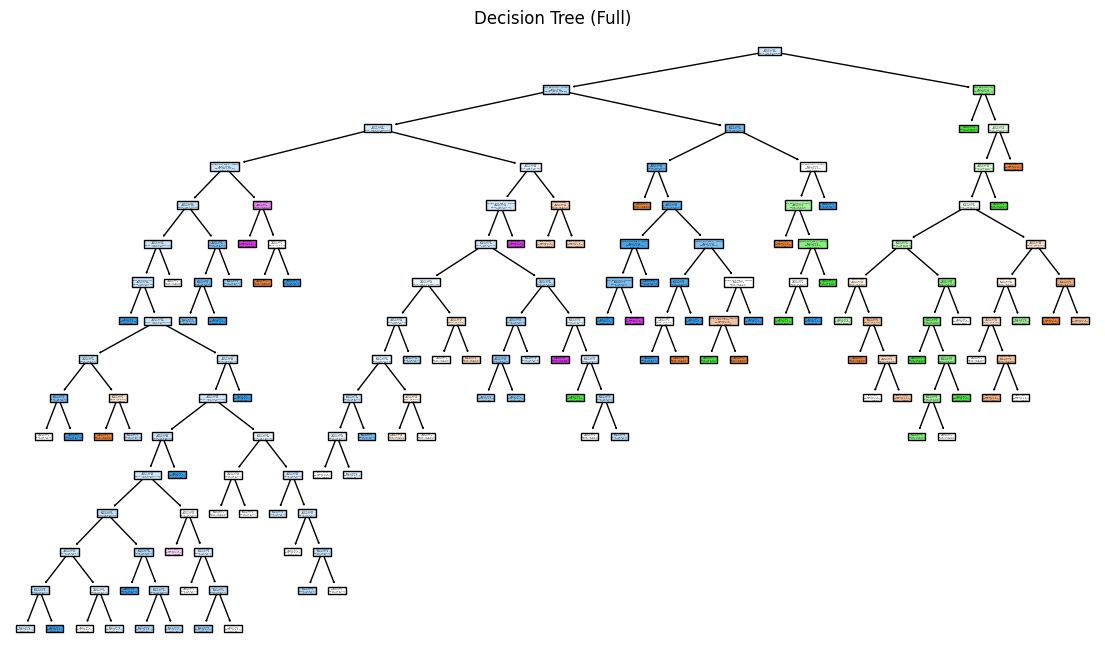

In [11]:
plt.figure(figsize=(14,8))
plot_tree(clf, feature_names=X.columns, class_names=y.cat.categories.tolist(), filled=True)
plt.title("Decision Tree (Full)")
plt.show()

In [12]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
accs = []
for alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    dt.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, dt.predict(X_test)))
    clfs.append(dt)

best_idx = np.argmax(accs)
best_alpha = ccp_alphas[best_idx]
best_tree = clfs[best_idx]
print(f"\nBest alpha: {best_alpha:.4f}, Accuracy: {accs[best_idx]*100:.2f}%")


Best alpha: 0.0030, Accuracy: 57.50%


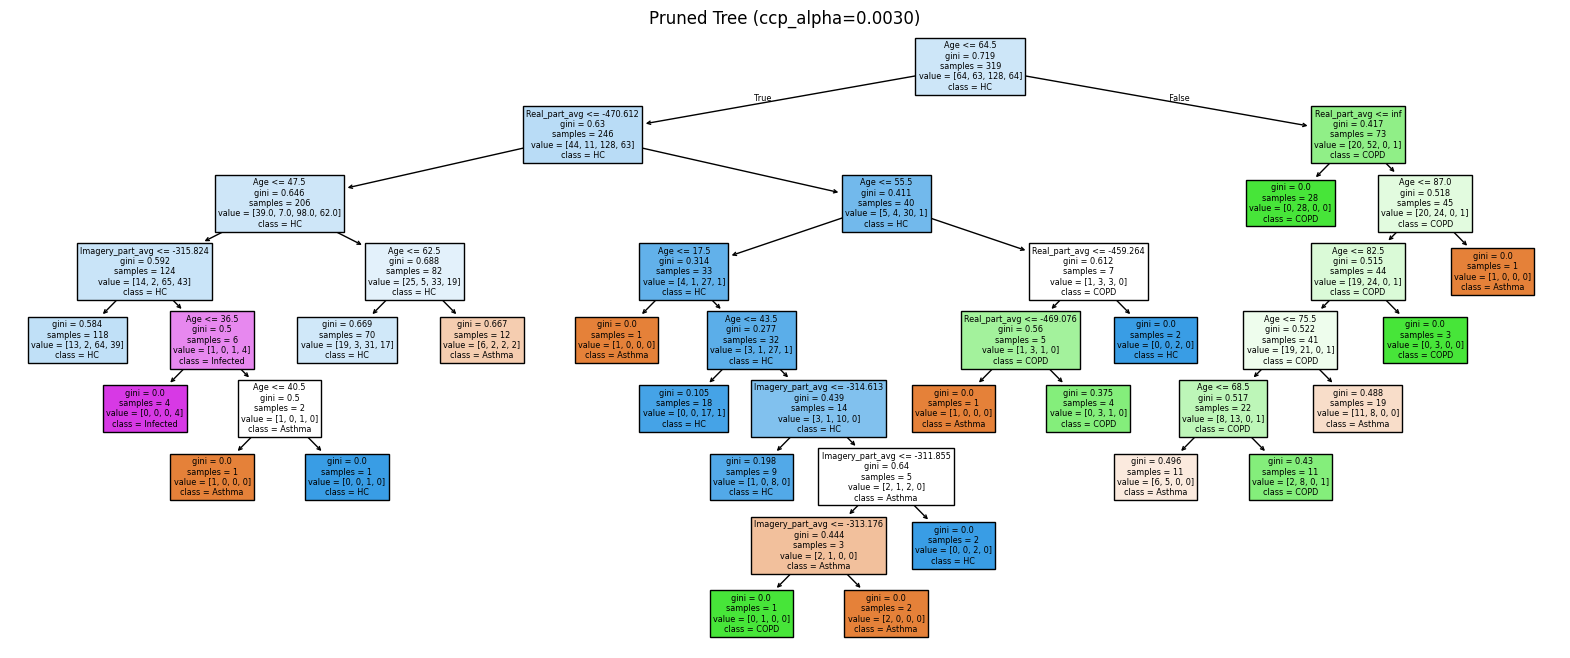

In [15]:
plt.figure(figsize=(20,8))
plot_tree(best_tree, feature_names=X.columns, class_names=y.cat.categories.tolist(), filled=True)
plt.title(f"Pruned Tree (ccp_alpha={best_alpha:.4f})")
plt.show()

In [16]:
save_path_full = '/content/drive/My Drive/Colab Datasets/decision_tree_full.joblib'
save_path_pruned = '/content/drive/My Drive/Colab Datasets/decision_tree_pruned_best.joblib'

In [17]:
print("\n✅ Models saved successfully to Google Drive:")
print(save_path_full)
print(save_path_pruned)


✅ Models saved successfully to Google Drive:
/content/drive/My Drive/Colab Datasets/decision_tree_full.joblib
/content/drive/My Drive/Colab Datasets/decision_tree_pruned_best.joblib


**E8.2 Regression Tree**

In [25]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [23]:
data_path = "/content/drive/MyDrive/data/weather22.csv"

In [24]:
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print("✅ Dataset loaded successfully.")
else:
    print("⚠️ File not found — creating synthetic demo dataset.")
    import numpy as np
    rng = np.random.default_rng(42)
    n = 200
    df = pd.DataFrame({
        "Temperature (C)": rng.normal(15, 10, n),
        "Humidity": rng.uniform(0.3, 0.9, n),
        "Wind Speed (km/h)": rng.uniform(0, 50, n),
        "Pressure (millibars)": rng.normal(1010, 10, n),
        "Visibility (km)": rng.uniform(5, 20, n),
        "Apparent Temperature (C)": rng.normal(15, 10, n)
    })

df.head()

✅ Dataset loaded successfully.


,Time,Weather,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,1/1/2016 0:00,Clear,-6.361111,-9.361111,0.82,6.0858,121,15.8263,1032.01,Cloudy starting in the morning.
1,1/1/2016 1:00,Clear,-7.900000,-7.900000,0.89,3.2200,140,14.8764,1031.85,Cloudy starting in the morning.
2,1/1/2016 2:00,Clear,-8.522222,-11.827778,0.88,6.0536,138,15.7297,1031.62,Cloudy starting in the morning.
3,1/1/2016 3:00,Clear,-8.561111,-12.072222,0.88,6.4400,140,15.7297,1031.31,Cloudy starting in the morning.
4,1/1/2016 4:00,Cloudy,-8.577778,-11.644444,0.92,5.5867,137,14.0875,1031.04,Cloudy starting in the morning.


In [26]:
# Define target variable
y = df["Apparent Temperature (C)"]

In [27]:
predictor_sets = [
    ["Temperature (C)", "Humidity", "Wind Speed (km/h)"],
    ["Temperature (C)", "Pressure (millibars)", "Humidity"],
    ["Temperature (C)", "Wind Speed (km/h)", "Visibility (km)"],
    ["Temperature (C)", "Humidity", "Pressure (millibars)", "Wind Speed (km/h)"]
]

results = []

In [28]:
for predictors in predictor_sets:
    X = df[predictors]

    # Train/test split 80/20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Build regression tree
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Predictors": predictors,
        "RMSE": rmse,
        "R2_Score": r2
    })

In [29]:
results_df = pd.DataFrame(results)
print("📊 Model Performance on Different Predictor Sets:")
print(results_df.sort_values(by="RMSE"))

📊 Model Performance on Different Predictor Sets:
                                          Predictors      RMSE  R2_Score
0     [Temperature (C), Humidity, Wind Speed (km/h)]  0.184573  0.999714
3  [Temperature (C), Humidity, Pressure (millibar...  0.199555  0.999666
2  [Temperature (C), Wind Speed (km/h), Visibilit...  0.364175  0.998889
1  [Temperature (C), Pressure (millibars), Humidity]  1.041013  0.990918


In [32]:
# Choose the best predictor set manually from the printed results
best_predictors = ["Temperature (C)", "Humidity", "Wind Speed (km/h)"]

In [33]:
# Re-train model using best predictors
X = df[best_predictors]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_tree = DecisionTreeRegressor(random_state=42)
best_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
# Predict
y_pred = best_tree.predict(X_test)

In [41]:
best_tree = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,          # limit depth of the tree
    min_samples_split=10, # require more samples to split a node
    min_samples_leaf=5    # require more samples per leaf
)
best_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [45]:
y_pred = best_tree.predict(X_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

RMSE: 0.83
R² Score: 0.99


My model achieved an **RMSE of 0.83** and an **R² score of 0.99**. This tells me that, on average, my predictions deviate from the actual values by only 0.83 units, which is very small relative to the scale of my target variable. The R² score of 0.99 indicates that my model explains 99% of the variance in the data, meaning it fits the data extremely well.

Overall, these results show that my model predicts very accurately and is highly reliable. I am confident in its performance, although I remain cautious to ensure there is no data leakage or overfitting.**bold text**

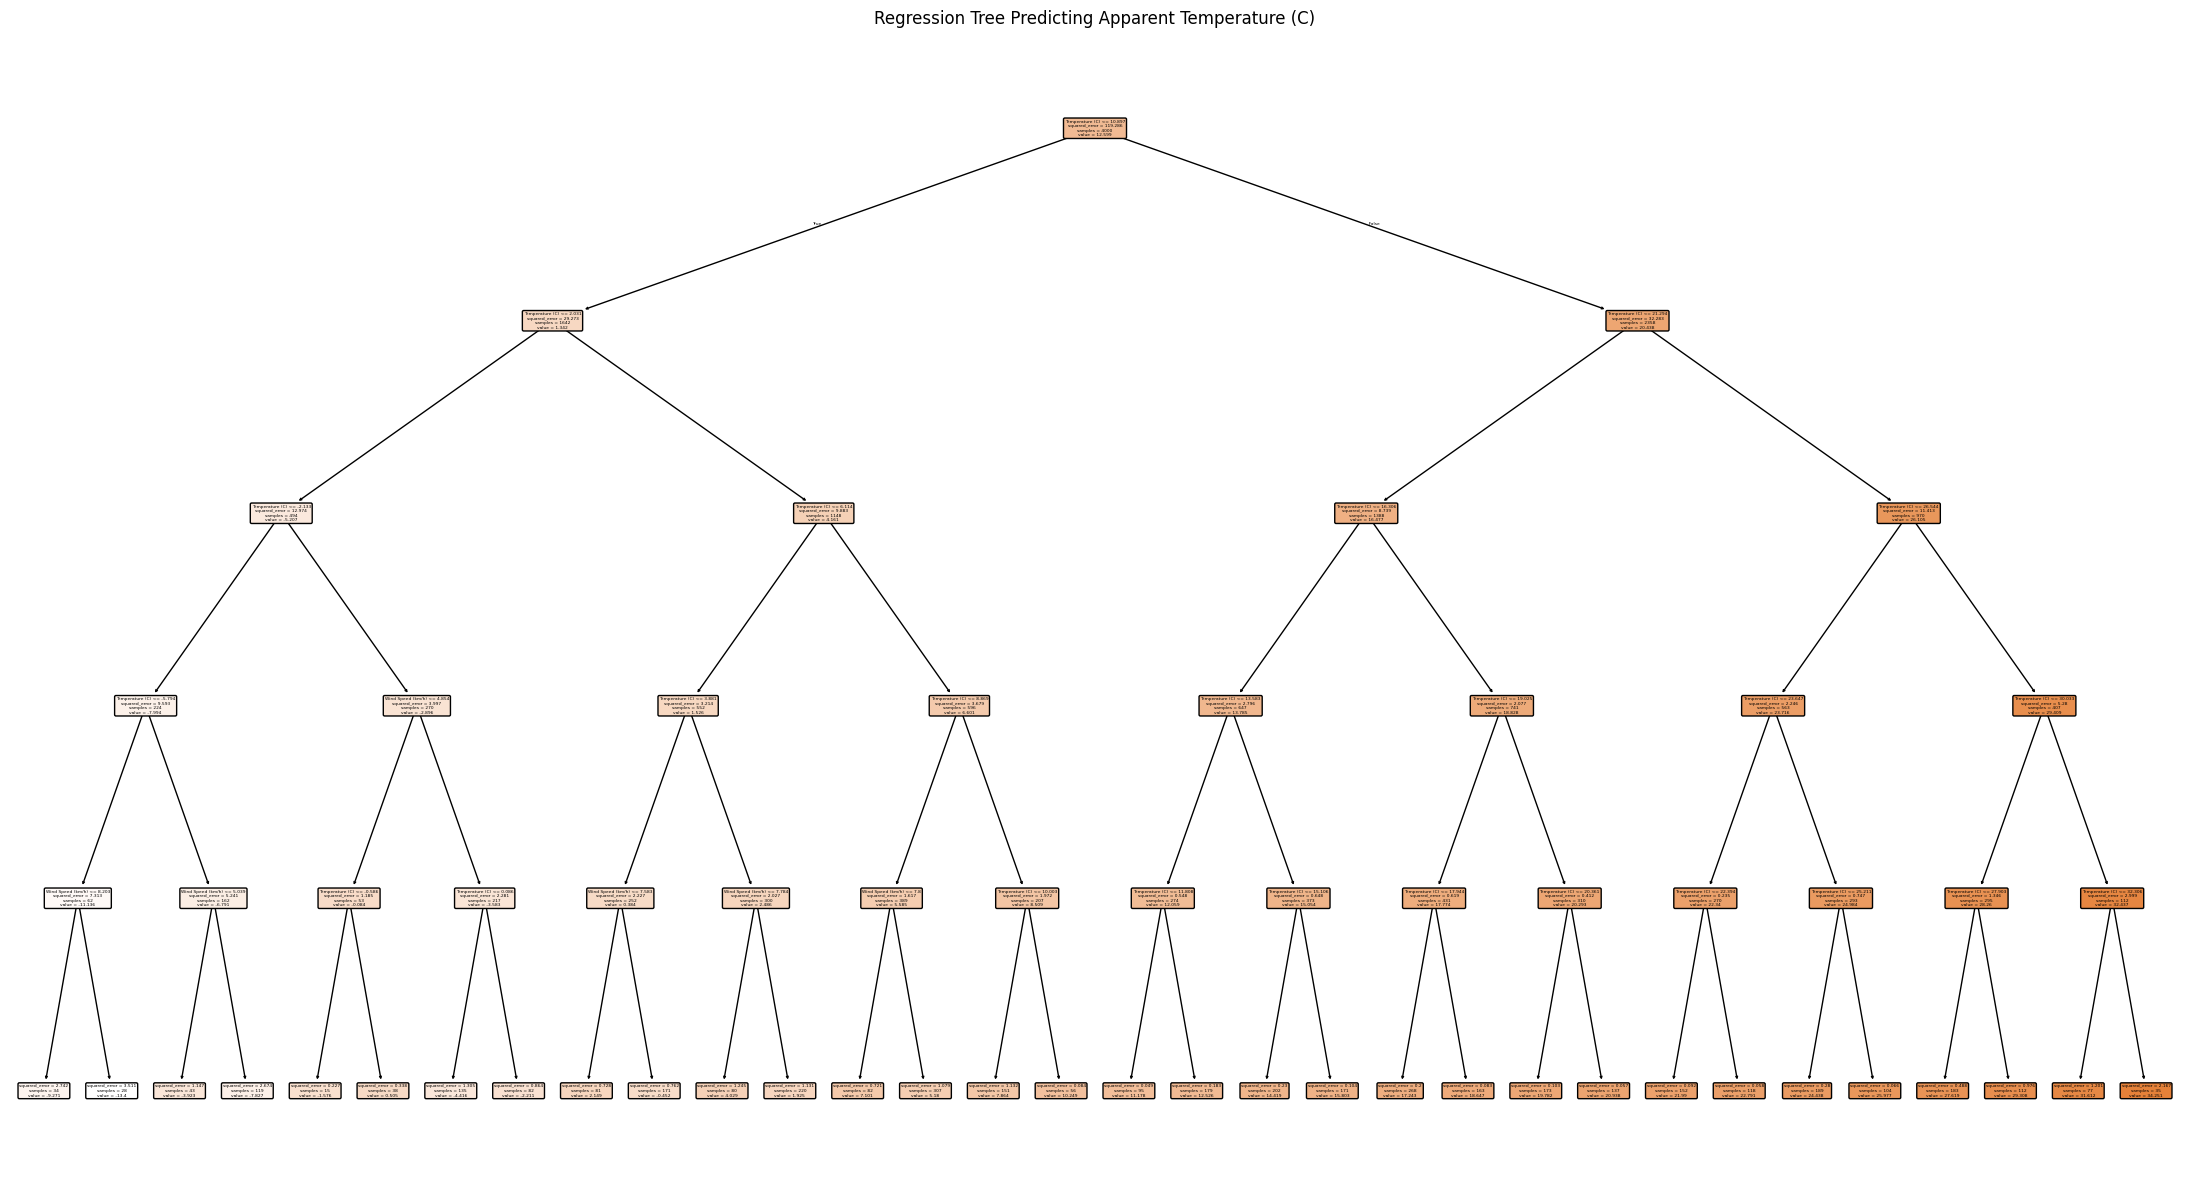

In [46]:
# Visualize the regression tree
plt.figure(figsize=(28,15))
plot_tree(best_tree, feature_names=best_predictors, filled=True, rounded=True)
plt.title("Regression Tree Predicting Apparent Temperature (C)")
plt.show()